In [1]:
import librosa.display
import tensorflow as tf
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data/features_3_sec.csv')

In [4]:
df.shape

(9990, 60)

In [5]:
df['tags'] = df['filename'].str.split('.').str[1]

In [6]:
df['tags1'] = df['filename'].str.split('.').str[0]

In [7]:
df['tags'].value_counts()

00000    100
00075    100
00073    100
00072    100
00071    100
        ... 
00038     99
00032     99
00031     99
00051     99
00049     99
Name: tags, Length: 100, dtype: int64

In [8]:
df.loc[(df['tags'] == '00002') & (df['tags1'] == 'blues')]

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
20  blues.00002.0.wav   66149          0.366614         0.090509  0.152206   
21  blues.00002.1.wav   66149          0.384461         0.084645  0.167405   
22  blues.00002.2.wav   66149          0.379043         0.086581  0.176237   
23  blues.00002.3.wav   66149          0.397078         0.080919  0.177723   
24  blues.00002.4.wav   66149          0.360683         0.088624  0.183903   
25  blues.00002.5.wav   66149          0.364035         0.088116  0.152364   
26  blues.00002.6.wav   66149          0.299589         0.083030  0.170790   
27  blues.00002.7.wav   66149          0.361508         0.079471  0.190943   
28  blues.00002.8.wav   66149          0.334331         0.081312  0.196997   
29  blues.00002.9.wav   66149          0.391811         0.078529  0.187923   

     rms_var  spectral_centroid_mean  spectral_centroid_var  \
20  0.002467             1676.978191          433761.847841   
21  0.001362             1337.448514           69939.396509   
22  0.001924             1590.857591          153760.844757   
23  0.001808             1436.270424           98276.302728   
24  0.001507             1540.099772          145972.646462   
25  0.001923             1594.920885          260781.775496   
26  0.001917             1396.794527           81945.617374   
27  0.003116             1549.572759           47057.458331   
28  0.003942             1704.564643           75336.469181   
29  0.005516             1673.364389           68382.596855   

    spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc17_var  \
20              1794.856236            56792.982500  ...   44.652466   
21              1658.057449            50969.919105  ...   65.734543   
22              1779.645051            79475.879079  ...   44.407555   
23              1690.135527            55831.185712  ...   49.576012   
24              1726.643189            65111.550643  ...   34.864491   
25              1730.746723           113020.010243  ...   46.145531   
26              1517.311972            92242.679953  ...   41.892445   
27              1788.919219            45072.259662  ...   39.133656   
28              1880.313683            46849.145321  ...   58.522827   
29              1893.572151            47306.278227  ...   24.065565   

    mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  mfcc20_var  \
20    -2.819872   50.686920    -2.062507   38.493343    -4.214690   23.373898   
21    -0.409954   47.267921    -1.283557   51.049812    -0.642756   27.588282   
22    -3.105310   40.462624    -4.471606   46.745087    -1.416849   35.118946   
23     2.942567   28.540144    -0.360661   54.554077    -1.046457   27.857132   
24    -2.013198   24.143799    -4.399901   32.495110    -3.156466   38.718266   
25    -2.628009   53.689621    -2.401809   59.490814    -0.967632   32.147289   
26    -6.356915   48.576363    -7.920033   24.511488    -0.412127   22.517632   
27     0.860312   79.191307    -5.330613   42.226936     1.075333   22.927328   
28     2.397915   65.363472    -6.671227   38.077599    -2.200269   30.644648   
29     2.025056   20.160931    -6.556604   29.323061    -1.891574   35.834270   

    label   tags  tags1  
20  blues  00002  blues  
21  blues  00002  blues  
22  blues  00002  blues  
23  blues  00002  blues  
24  blues  00002  blues  
25  blues  00002  blues  
26  blues  00002  blues  
27  blues  00002  blues  
28  blues  00002  blues  
29  blues  00002  blues  

[10 rows x 62 columns]

In [9]:
save_for_analysis = df.loc[(df['tags'] == '00002') & (df['tags1'] == 'blues')]['chroma_stft_mean']

In [10]:
df.drop(['filename','tags'],axis =1 ,inplace = True)

In [11]:
df.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0   66149          0.335406         0.091048  0.130405  0.003521   
1   66149          0.343065         0.086147  0.112699  0.001450   
2   66149          0.346815         0.092243  0.132003  0.004620   
3   66149          0.363639         0.086856  0.132565  0.002448   
4   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc17_mean  mfcc17_var  \
0           117335.771563   3714.560359  ...    -3.241280   36.488243   
1            65671.875673   3869.682242  ...    -6.055294   40.677654   
2            75124.921716   3997.639160  ...    -1.768610   28.348579   
3            82913.639269   3568.300218  ...    -3.841155   28.337118   
4            60204.020268   3469.992864  ...     0.664582   45.880913   

   mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  mfcc20_var  \
0     0.722209   38.099152    -5.050335   33.618073    -0.243027   43.771767   
1     0.159015   51.264091    -2.837699   97.030830     5.784063   59.943081   
2     2.378768   45.717648    -1.938424   53.050835     2.517375   33.105122   
3     1.218588   34.770935    -3.580352   50.836224     3.630866   32.023678   
4     1.689446   51.363583    -3.392489   26.738789     0.536961   29.146694   

   label  tags1  
0  blues  blues  
1  blues  blues  
2  blues  blues  
3  blues  blues  
4  blues  blues  

[5 rows x 60 columns]

In [ ]:
VISUALISASI DATASET

## Blues

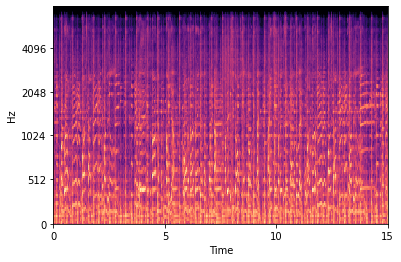

In [70]:
import librosa
import librosa.display
y, sr = librosa.load('/content/drive/MyDrive/Data/genres_original/blues/blues.00000.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');

## Classical

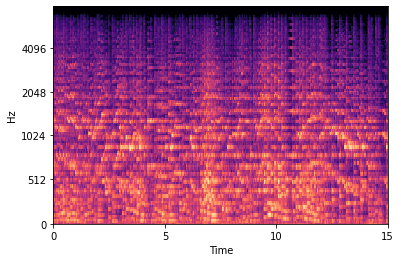

In [71]:
import librosa
import librosa.display
y, sr = librosa.load('/content/drive/MyDrive/Data/genres_original/classical/classical.00000.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');

## Country

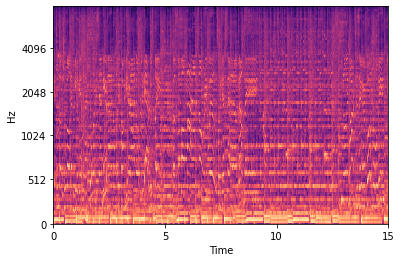

In [72]:
import librosa
import librosa.display
y, sr = librosa.load('/content/drive/MyDrive/Data/genres_original/country/country.00004.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');

## Disco

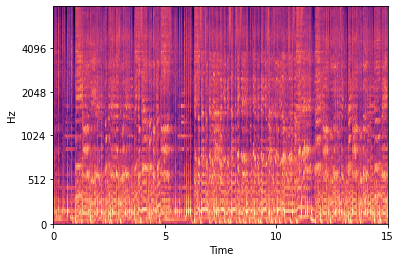

In [73]:
import librosa
import librosa.display
y, sr = librosa.load('/content/drive/MyDrive/Data/genres_original/disco/disco.00013.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');

## Hiphop

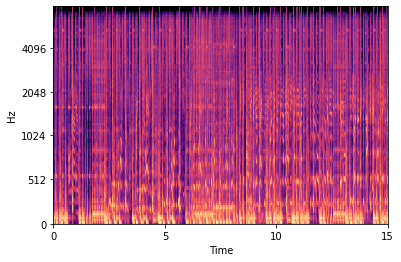

In [74]:
import librosa
import librosa.display
y, sr = librosa.load('/content/drive/MyDrive/Data/genres_original/hiphop/hiphop.00006.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');

## Jazz

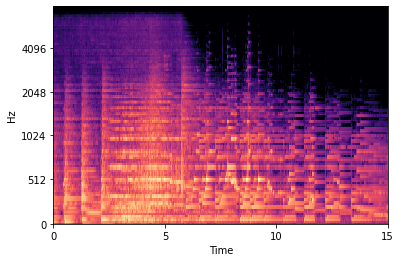

In [75]:
import librosa
import librosa.display
y, sr = librosa.load('/content/drive/MyDrive/Data/genres_original/jazz/jazz.00003.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');

## Metal

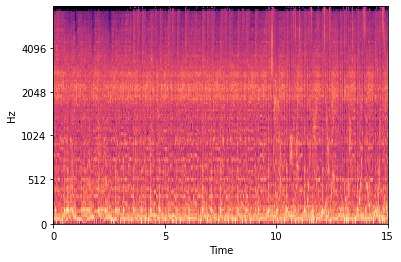

In [76]:
import librosa
import librosa.display
y, sr = librosa.load('/content/drive/MyDrive/Data/genres_original/metal/metal.00007.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');

## Pop

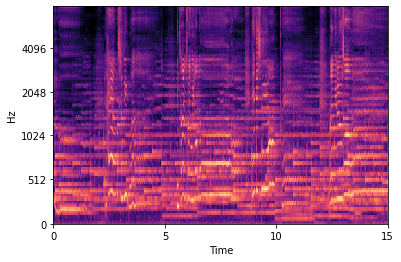

In [77]:
import librosa
import librosa.display
y, sr = librosa.load('/content/drive/MyDrive/Data/genres_original/pop/pop.00011.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');

## Reggae

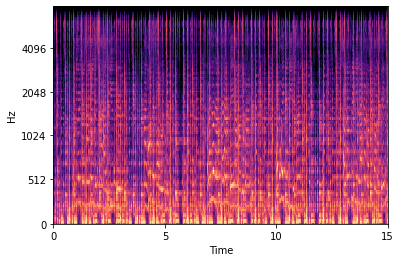

In [78]:
import librosa
import librosa.display
y, sr = librosa.load('/content/drive/MyDrive/Data/genres_original/reggae/reggae.00009.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');

## Rock

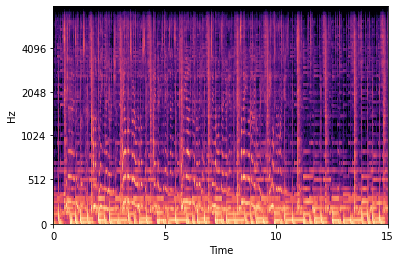

In [79]:
import librosa
import librosa.display
y, sr = librosa.load('/content/drive/MyDrive/Data/genres_original/rock/rock.00013.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');

FITUR EKASTRAKSI MFCC

In [12]:
rec_file = '/content/drive/MyDrive/Data/genres_original/blues/blues.00002.wav'
data,sr = librosa.load(rec_file)

In [13]:
librosa.load(rec_file,sr=44100) # Opening in sample rate of 44100

(array([ 0.01888484,  0.03553968,  0.04781976, ..., -0.12216461,
        -0.12027903, -0.06499076], dtype=float32), 44100)

In [14]:
import IPython
IPython.display.Audio(data,rate = sr)

# MFCC Extraction

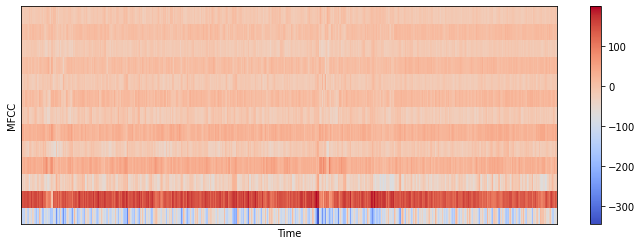

In [20]:
plt.figure(figsize = (12,4))
mfcc = librosa.feature.mfcc(data,n_fft =n_fft,hop_length = hop_length,n_mfcc=13)
librosa.display.specshow(mfcc,sr = sr,hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()

In [21]:
import os
path = '/content/drive/MyDrive/Aplikasi Prediksi Genre Musik/Data/genres_original'
filenames_all = []
labels = []
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(path)):    
    if dirpath != path:
        filenames_all.append(filenames)
        labels.append(len(filenames_all[i-1])*[i-1])


In [22]:
len(labels)

10

In [23]:
i = 0
j = 0
filenames_all[i][j]

'metal.00000.wav'

In [24]:
import math
import librosa
import json
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:
            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)

            # process all audio files in genre sub-dir
            for f in filenames:

        # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [25]:
save_mfcc(dataset_path = '/content/drive/MyDrive/Aplikasi Prediksi Genre Musik/Data/genres_original',
          json_path = 'data.json')

In [26]:
import json
with open('data.json') as fp:
        data = json.load(fp)
        X = np.array(data['mfcc'])
        y = np.array(data['labels'])

In [27]:
set(y) # These are unique values
#0-> Blues
#1-> classical
#2-> country
#3-> disco
#4-> hiphop
#5-> jazz
#6-> metal
#7-> pop
#8-> reggae
#9-> rock

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [28]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

Saya mencoba menggunakan model ANN

In [29]:

# splitting the data into Train and Test sets.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

from tensorflow import keras
model = keras.Sequential(
    [   # Input
        keras.layers.Flatten(input_shape = (X.shape[1], X.shape[2])),
        # Hidden 
        keras.layers.Dense(512, activation = "relu", kernel_regularizer = keras.regularizers.l2(0.001)),
        # Dropout to reduce overfitting.
        keras.layers.Dropout(0.3),
        # Hidden 
        keras.layers.Dense(256, activation = "relu", kernel_regularizer = keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        # Hidden 
        keras.layers.Dense(64, activation = "relu", kernel_regularizer = keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        
        # Ouput
        keras.layers.Dense(10,activation = "softmax")
    ]
)

In [30]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = optimizer,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"]
              )
model.fit(X_train,y_train,
          validation_data = (X_test,y_test),
          epochs = 50,
          batch_size = 32)

Epoch 1/50
110/110 [==============================] - 5s 34ms/step - loss: 35.5425 - accuracy: 0.1625 - val_loss: 4.5167 - val_accuracy: 0.2724
Epoch 2/50
110/110 [==============================] - 3s 25ms/step - loss: 10.9781 - accuracy: 0.1845 - val_loss: 3.8003 - val_accuracy: 0.2830
Epoch 3/50
110/110 [==============================] - 2s 21ms/step - loss: 6.9215 - accuracy: 0.1903 - val_loss: 3.6950 - val_accuracy: 0.2710
Epoch 4/50
110/110 [==============================] - 3s 30ms/step - loss: 4.9657 - accuracy: 0.1948 - val_loss: 3.6310 - val_accuracy: 0.2510
Epoch 5/50
110/110 [==============================] - 3s 28ms/step - loss: 4.1073 - accuracy: 0.2057 - val_loss: 3.5294 - val_accuracy: 0.2777
Epoch 6/50
110/110 [==============================] - 4s 32ms/step - loss: 3.8291 - accuracy: 0.2069 - val_loss: 3.4520 - val_accuracy: 0.2777
Epoch 7/50
110/110 [==============================] - 2s 22ms/step - loss: 3.6243 - accuracy: 0.2375 - val_loss: 3.3996 - val_accuracy: 0.30

Ketika Menggunakan ANN saya mendapat akurasi yang rendah. Kemudian saya akan mencoba menggunakan CNN.

In [31]:
# Preparing the datasets.
def train_test_validate_split(validation_size):
    with open('data.json') as fp:
            data = json.load(fp)
            X = np.array(data['mfcc'])
            y = np.array(data['labels'])
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25)
    X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size = validation_size)
    
    # For using CNN we will require a 3d Array 
    X_train = X_train[...,np.newaxis] # it will create a 4d array (number of samples, 259, 13, 1)
    X_validation = X_validation[...,np.newaxis]
    X_test = X_test[...,np.newaxis]
    return X_train, X_validation, X_test, y_train, y_validation, y_test
    
    

In [32]:
#CNN

# Creating a Train, Validation and Test Sets
X_train, X_validation, X_test, y_train, y_validation, y_test = train_test_validate_split(0.2)


In [33]:
X_train.shape

(2995, 259, 13, 1)

In [34]:
# Creating A Model CNN 
from tensorflow import keras
input_shape =  (X_train.shape[1], X_train.shape[2],1) # Adding input shape 
cnn_model = keras.Sequential()


In [35]:
# For early stopping of model
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5)


In [36]:
# 1st layer
cnn_model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
cnn_model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
cnn_model.add(keras.layers.BatchNormalization())
# 2nd layer
cnn_model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
cnn_model.add(keras.layers.BatchNormalization())
# 3rd layer
cnn_model.add(keras.layers.Conv2D(64, (2, 2), activation='relu'))
cnn_model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
cnn_model.add(keras.layers.BatchNormalization())
# flatten output and then use dense layer
cnn_model.add(keras.layers.Flatten())

cnn_model.add(keras.layers.Dense(128, activation='relu'))
cnn_model.add(keras.layers.Dropout(0.3))

cnn_model.add(keras.layers.Dense(64, activation='relu'))
cnn_model.add(keras.layers.Dropout(0.3))

cnn_model.add(keras.layers.Dense(32, activation='relu'))
cnn_model.add(keras.layers.Dropout(0.3))

# output layer
cnn_model.add(keras.layers.Dense(10, activation='softmax'))

# Optimizers
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
cnn_model.compile(optimizer = optimizer,
             loss = 'sparse_categorical_crossentropy',
             metrics = ["accuracy"])

In [37]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 257, 11, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 129, 6, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 129, 6, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 4, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 2, 64)        0         
 2D)                                                             
                                                      

Saya mendapat hasil yang lebih baik saat menggunakan CNN daripada menggunakan ANN

In [38]:
cnn_model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=60,callbacks = [callback])

Epoch 1/60
94/94 [==============================] - 30s 305ms/step - loss: 2.6191 - accuracy: 0.1429 - val_loss: 2.0577 - val_accuracy: 0.2750
Epoch 2/60
94/94 [==============================] - 26s 275ms/step - loss: 2.1959 - accuracy: 0.2240 - val_loss: 1.8443 - val_accuracy: 0.3992
Epoch 3/60
94/94 [==============================] - 28s 296ms/step - loss: 2.0378 - accuracy: 0.2694 - val_loss: 1.6820 - val_accuracy: 0.4579
Epoch 4/60
94/94 [==============================] - 24s 255ms/step - loss: 1.9089 - accuracy: 0.3045 - val_loss: 1.5228 - val_accuracy: 0.5220
Epoch 5/60
94/94 [==============================] - 31s 327ms/step - loss: 1.8371 - accuracy: 0.3489 - val_loss: 1.4467 - val_accuracy: 0.5340
Epoch 6/60
94/94 [==============================] - 26s 279ms/step - loss: 1.7372 - accuracy: 0.3776 - val_loss: 1.3768 - val_accuracy: 0.5594
Epoch 7/60
94/94 [==============================] - 28s 297ms/step - loss: 1.6540 - accuracy: 0.4234 - val_loss: 1.3180 - val_accuracy: 0.5728

In [39]:
test_error, test_accuracy = cnn_model.evaluate(X_test,y_test)
print(f'We are getting test accuracy as: {test_accuracy}')

40/40 [==============================] - 3s 79ms/step - loss: 0.9491 - accuracy: 0.7318
We are getting test accuracy as: 0.7317854166030884


In [40]:
X_predict = X_test[10]
y_predict = y_test[10]

In [41]:
X_predict.shape

(259, 13, 1)

In [42]:
# Our model take (259,13,1,1) shape so we need to add one more axis 
X_predict = X_predict[np.newaxis, ...]

In [43]:
prediction = cnn_model.predict(X_predict)

1/1 [==============================] - 0s 312ms/step


In [44]:
predicted_index = np.argmax(prediction, axis=1)

In [45]:
# Lets see if our model is predicting properly or not 
print(predicted_index,y_predict)

[2] 2


In [46]:
# Saving the  model
cnn_model.save('music-gen-classify-v1.h5')

In [47]:
from tensorflow import keras
new_model = keras.models.load_model('music-gen-classify-v1.h5')

In [48]:
X_predict.shape

(1, 259, 13, 1)

In [49]:
pred = new_model.predict(X_predict)
np.argmax(pred,axis = 1)

1/1 [==============================] - 0s 129ms/step


array([2])

In [50]:
import librosa

def get_mfcc(dataset_path,audio_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    new_data = {
        "mfcc": []
    }

    SAMPLE_RATE = 22050
    audio,sample_rate = librosa.load(audio_path,sr = SAMPLE_RATE)
    TRACK_DURATION = int(librosa.get_duration(audio)) # measured in seconds
    SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath is not dataset_path:
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                for d in range(num_segments):
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        new_data["mfcc"].append(mfcc.tolist())

    return new_data

In [53]:
res = get_mfcc(dataset_path = '/content/drive/MyDrive/Aplikasi Prediksi Genre Musik/Data/upload',audio_path = '/content/drive/MyDrive/Aplikasi Prediksi Genre Musik/Data/upload/user/Country.wav')

In [54]:
ans = np.array(res['mfcc'])
ans = ans[...,np.newaxis]